In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)#

    except RuntimeError as e:
        print(e)

In [2]:
"""

This is for morphological classification of galaxies by CNN,
By Kenji Bekki, on 2017/11/15
Revised on 2020/2/14 (Nair & Abraham 2010)
For test only.

"""

from keras.models import model_from_json
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib notebook
mpl.rcParams['figure.figsize'] = [10, 10]
mpl.rcParams['figure.dpi'] = 72

%run ../data_preparation/FILE_IO_FUNCTIONS.ipynb
x, Y = load_total_combined_data_DR15()


# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

y_pred_prob = loaded_model.predict(x)

y_pred = y_pred_prob.argmax(axis=1)

Loaded model from disk


In [3]:
E_galaxy_names = load_dataframe("DR15_NO_DISC")
ES_galaxy_names = load_dataframe("DR15_DISC")
galaxy_names = E_galaxy_names.append(ES_galaxy_names, ignore_index=True)['name']
galaxy_names = galaxy_names.str.strip()

<IPython.core.display.Javascript object>


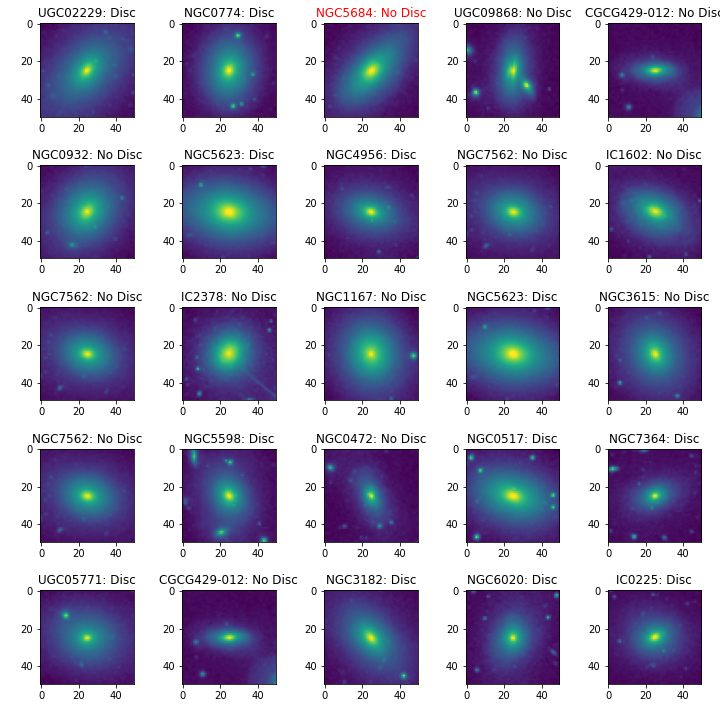

[59 59 39 74 52 46 41 25 47 49 46  2 21 19 59 38  4 23 74 57 25 73 17 71
 11]
[[ 0 42]
 [ 1 37]]


In [4]:
%run ..\helpers\plotting_helpers.ipynb
plot_classification_results(images=x, y_preds=y_pred, y_trues=Y, y_labels=("No Disc", "Disc"), galaxy_names= galaxy_names, random_sample=True)

unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

recall 0.9166666666666666
precision 0.8918918918918919


<IPython.core.display.Javascript object>


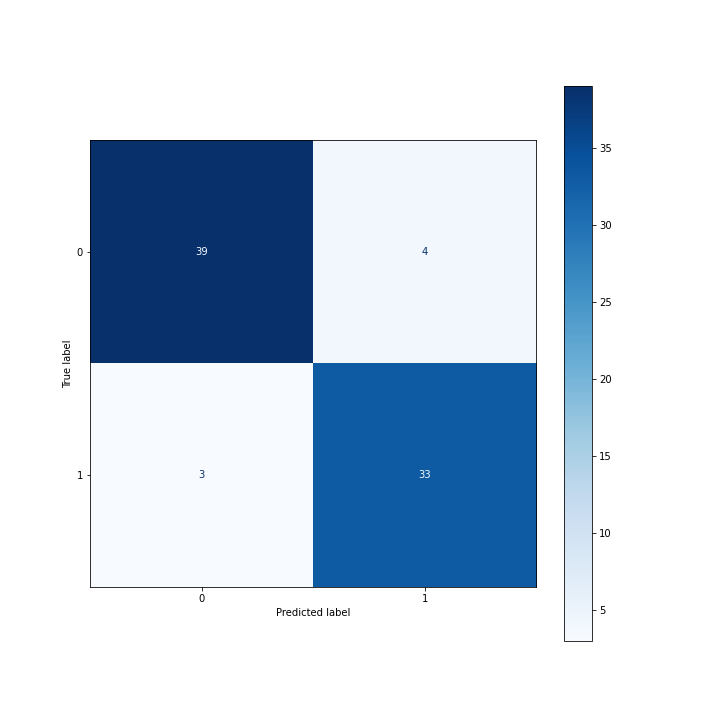

In [5]:
from sklearn import metrics

true_data = Y
predicted_data = y_pred

print("recall", str(metrics.recall_score(true_data, predicted_data)))
print("precision", str(metrics.precision_score(true_data, predicted_data)))

metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(true_data, predicted_data)).plot(cmap='Blues')

